In [1]:
import os
import sys

sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [322]:
df = pd.read_hdf("../data_extract/features_dataset_2.h5")
df

,centroid,chname,crest,flatness,fname,kurtosis,mean,pgender,pid,pname,...,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11
0,1706.316065,121123,0.038081,0.475663,84-121123-0016.wav,105.501765,0.015711081687,F,84,Christie Nowak,...,0.662004,0.930706,0.558052,1.000000,0.994830,0.702775,0.769200,0.911078,0.696455,0.869109
1,4388.959022,121123,0.005951,0.554432,84-121123-0016.wav,2.672185,0.582293154002,F,84,Christie Nowak,...,0.595706,0.517994,0.571380,0.923243,0.971832,1.000000,0.794728,0.701908,0.922007,0.790003
2,1819.436149,121123,0.050384,0.289485,84-121123-0016.wav,237.231984,0.878617007474,F,84,Christie Nowak,...,0.128342,0.301172,0.164163,0.180865,0.250195,0.514340,1.000000,0.430893,0.345789,0.289524
3,3827.743748,121123,0.010779,0.666258,84-121123-0016.wav,21.375003,0.883084856577,F,84,Christie Nowak,...,0.712327,0.573787,0.622449,0.576607,0.562628,0.773970,0.978046,0.793404,0.939571,0.925992
4,702.438360,121123,0.123519,0.135431,84-121123-0016.wav,272.388879,0.274598716718,F,84,Christie Nowak,...,0.156490,0.188149,0.172405,1.000000,0.486268,0.171874,0.161920,0.212369,0.125251,0.219221
5,978.770605,121123,0.080176,0.168631,84-121123-0016.wav,214.020464,0.224624544856,F,84,Christie Nowak,...,0.418507,0.309847,0.389104,0.506151,1.000000,0.593027,0.660452,0.554273,0.485566,0.458215
6,2000.640652,121123,0.026209,0.431041,84-121123-0016.wav,81.278179,0.0360727835708,F,84,Christie Nowak,...,0.282757,0.442674,0.335306,0.353952,0.412010,0.511279,1.000000,0.801275,0.699660,0.847721
7,1034.502518,121123,0.081917,0.199381,84-121123-0016.wav,130.078511,0.291780779347,F,84,Christie Nowak,...,0.089658,0.139824,0.155764,0.195650,0.210741,0.451858,1.000000,0.687926,0.225644,0.231551
8,4550.259066,121123,0.008773,0.674404,84-121123-0016.wav,16.534991,0.337120488197,F,84,Christie Nowak,...,0.348869,0.345926,0.353333,0.424683,0.390227,0.627938,0.407615,0.418710,0.755541,1.000000
9,1754.408800,121123,0.044774,0.371396,84-121123-0016.wav,130.575634,0.251035412418,F,84,Christie Nowak,...,0.443939,0.661212,0.794298,1.000000,0.384347,0.352143,0.475808,0.435479,0.580161,0.794552


In [323]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

df = df[np.isfinite(df['centroid'])]
mlb = MultiLabelBinarizer()
le = preprocessing.LabelEncoder()
df['id'] = le.fit_transform(df['pid'])
le = preprocessing.LabelEncoder()
chlist = ["mfcc{}".format(i) for i in range(14)]
df[chlist]
features = df[chlist]
features
arr = np.array(df['id']).tolist()
brr = [tuple([i]) for i in arr]
labels = mlb.fit_transform(brr)
labels

/home/tirth14/anaconda2/envs/voice/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,-19.777201,6.901985,1.936807,1.021603,-0.119498,-0.593620,-0.535097,-1.005223,0.800797,0.094655,-0.065198,0.061085,-0.728600,0.625721
1,-3.808987,-0.932137,-2.983410,-0.998565,0.341077,1.167946,0.244293,-1.172661,-1.141522,-0.074055,0.272924,0.921592,0.460410,0.257009
2,-1.392916,-0.811752,-3.860861,-0.869700,0.659442,0.563513,1.709309,0.379448,-2.415922,0.140622,1.101134,1.475450,0.240394,-0.679706
3,-3.264262,1.504658,-2.866201,-3.614396,-1.039868,1.267592,0.024544,0.739038,-1.923319,-1.016879,-0.272135,0.536253,1.036659,0.210620
4,-0.201805,2.571589,-0.569425,-0.386768,1.507350,0.611312,-0.350011,-0.254828,-0.514909,-0.215797,-0.178158,0.434724,2.459252,2.219619
5,-2.726384,3.115928,-0.796058,-0.978189,-0.576039,-0.633983,0.504060,-2.092458,0.056684,0.428486,-1.013026,1.054889,0.602423,1.297937
6,-11.945762,1.735853,-1.159439,-1.856223,0.028402,2.057528,1.578731,0.393360,-0.106214,-0.355977,0.209086,0.725657,0.254548,-0.583119
7,-9.921964,5.480413,-3.242262,-4.015876,1.760038,1.058935,1.383407,0.733412,-2.563318,-3.015862,1.028740,0.149119,0.466692,0.009767
8,-6.649322,0.880376,-4.471429,-1.170266,-2.046436,-0.167375,3.120803,-0.904432,-0.319395,-1.335028,-0.099756,0.364063,1.021800,-0.074649
9,-2.574461,2.223920,-0.684388,-0.104038,-0.601037,0.418404,2.933366,-0.310633,-1.276895,-1.190887,-0.212140,1.643580,-0.024706,-0.732606


,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,-19.777201,6.901985,1.936807,1.021603,-0.119498,-0.593620,-0.535097,-1.005223,0.800797,0.094655,-0.065198,0.061085,-0.728600,0.625721
1,-3.808987,-0.932137,-2.983410,-0.998565,0.341077,1.167946,0.244293,-1.172661,-1.141522,-0.074055,0.272924,0.921592,0.460410,0.257009
2,-1.392916,-0.811752,-3.860861,-0.869700,0.659442,0.563513,1.709309,0.379448,-2.415922,0.140622,1.101134,1.475450,0.240394,-0.679706
3,-3.264262,1.504658,-2.866201,-3.614396,-1.039868,1.267592,0.024544,0.739038,-1.923319,-1.016879,-0.272135,0.536253,1.036659,0.210620
4,-0.201805,2.571589,-0.569425,-0.386768,1.507350,0.611312,-0.350011,-0.254828,-0.514909,-0.215797,-0.178158,0.434724,2.459252,2.219619
5,-2.726384,3.115928,-0.796058,-0.978189,-0.576039,-0.633983,0.504060,-2.092458,0.056684,0.428486,-1.013026,1.054889,0.602423,1.297937
6,-11.945762,1.735853,-1.159439,-1.856223,0.028402,2.057528,1.578731,0.393360,-0.106214,-0.355977,0.209086,0.725657,0.254548,-0.583119
7,-9.921964,5.480413,-3.242262,-4.015876,1.760038,1.058935,1.383407,0.733412,-2.563318,-3.015862,1.028740,0.149119,0.466692,0.009767
8,-6.649322,0.880376,-4.471429,-1.170266,-2.046436,-0.167375,3.120803,-0.904432,-0.319395,-1.335028,-0.099756,0.364063,1.021800,-0.074649
9,-2.574461,2.223920,-0.684388,-0.104038,-0.601037,0.418404,2.933366,-0.310633,-1.276895,-1.190887,-0.212140,1.643580,-0.024706,-0.732606


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.10, random_state=42)
X, y = features_train, labels_train
clf = OneVsRestClassifier(LinearSVC(C=100))
model = clf.fit(X, y)
output = model.predict(features_test)
accuracy_score(labels_test, output)

In [320]:
output[35]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['id'] = le.fit_transform(df['pid'])
df2 = df.loc[(df['pid']=='1272') | (df['pid']=='84')]
chlist = ["chroma{}".format(i) for i in range(12)]

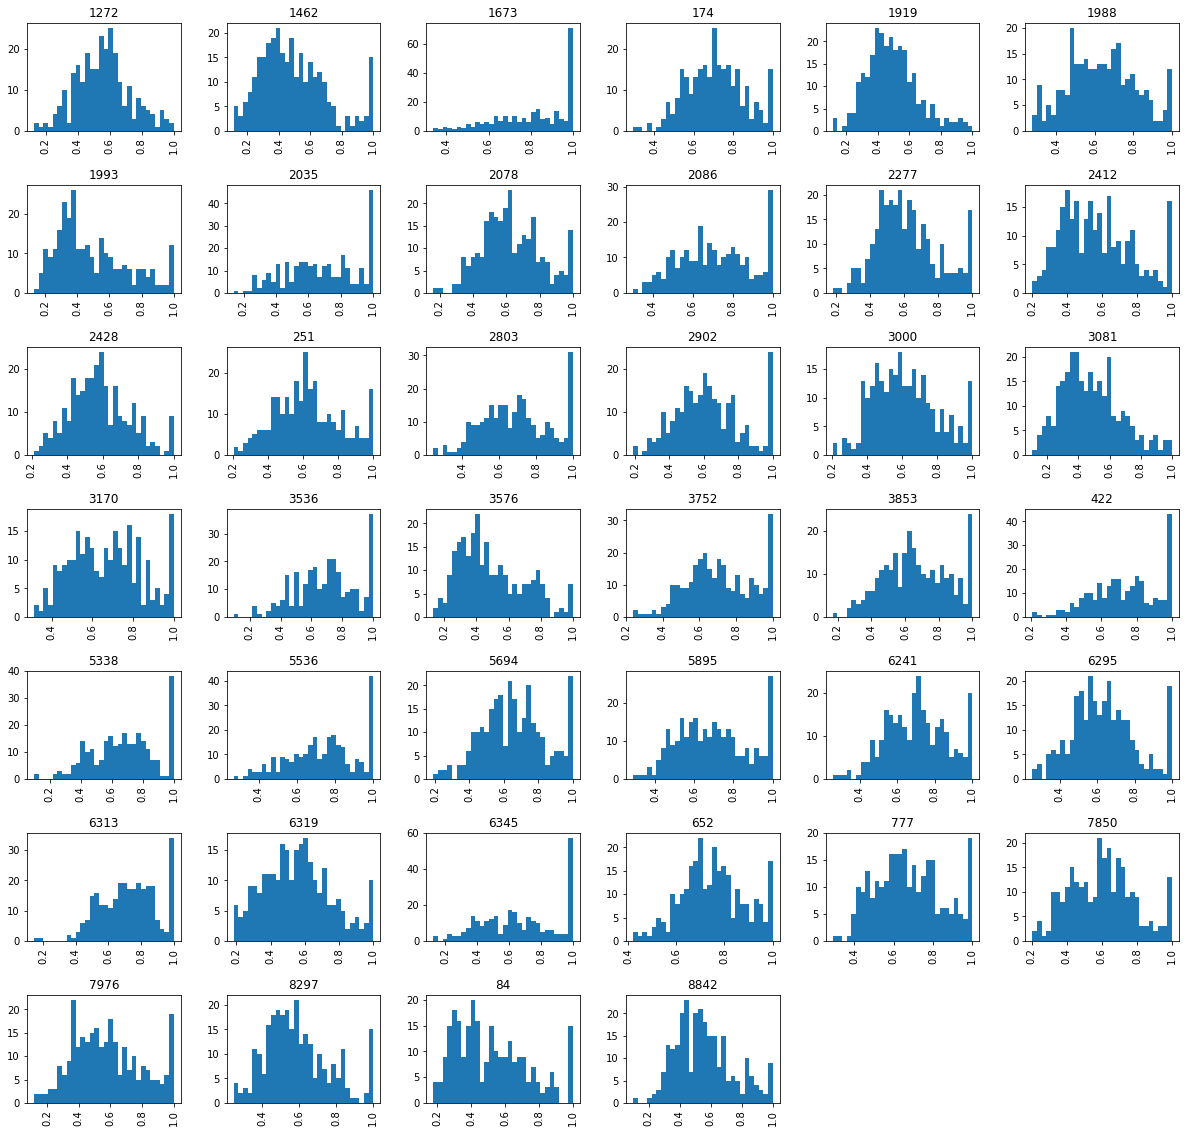

In [67]:
hist = df.hist(column="chroma0", by="pid", bins=30,  figsize = (20,20))

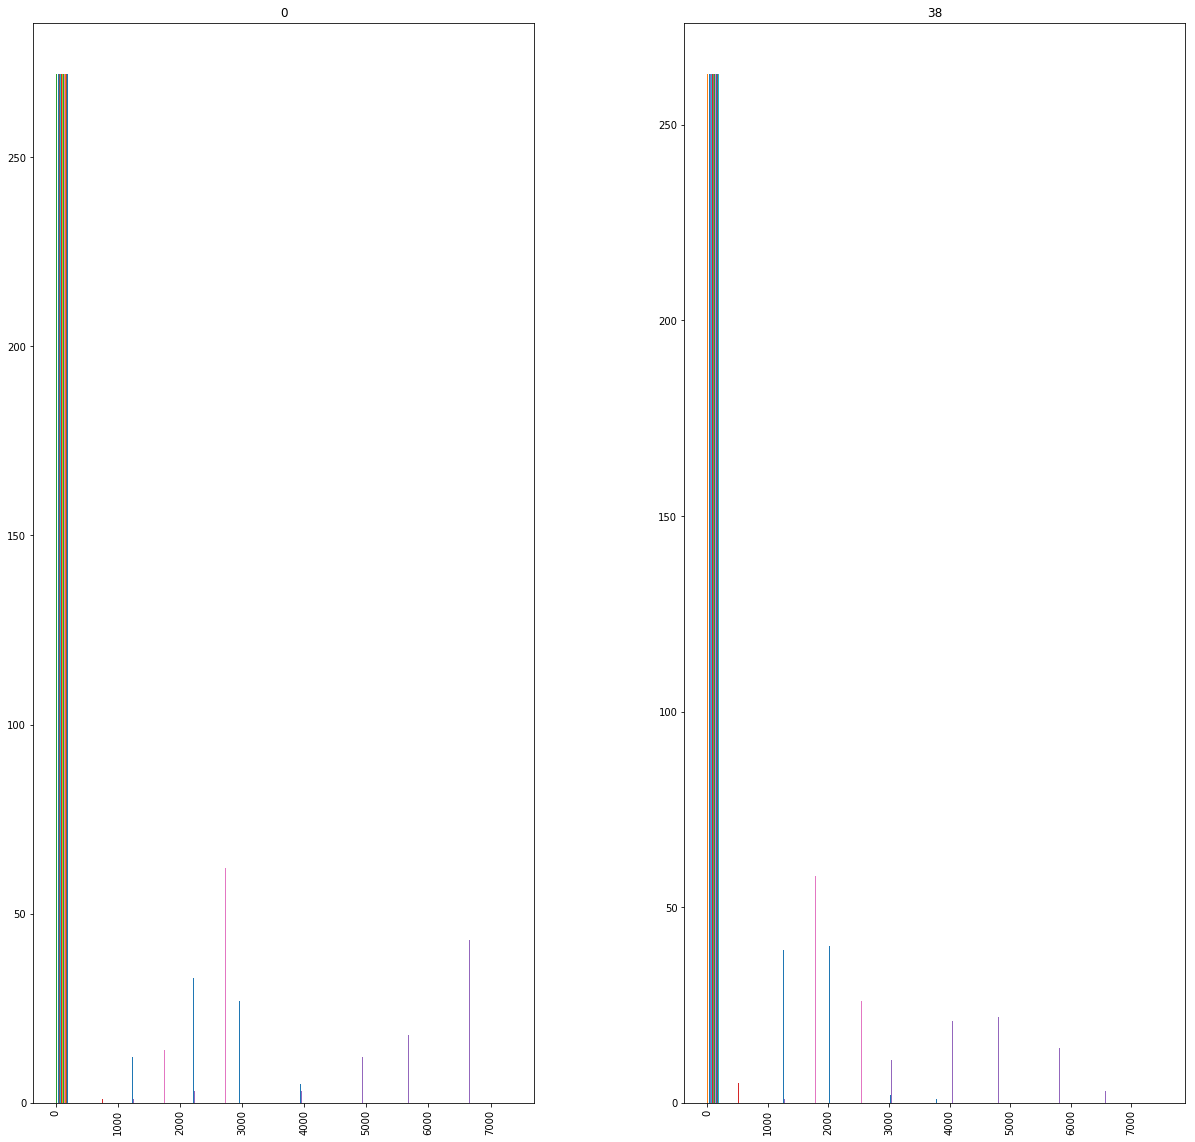

In [80]:
hist2 = df2.hist(column=chlist, bins=30, by="id", figsize = (20,20))